In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/train.csv')

In [ ]:
df.drop(columns=['id', 'date'],inplace=True)

# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='price'), df['price'],
    test_size=0.2,
    random_state=42
)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12967, 18)
(3242, 18)
(12967,)
(3242,)


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

print("R2 score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAPE (%):", mean_absolute_percentage_error(y_test, y_pred_rf)*100)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

R2 score: 0.8668551503597173
MSE: 16708162150.05144
MAPE (%): 13.037901542596861
RMSE: 129260.05628209915


# **Hyperparameter Tuning in Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [200, 400, 600],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [ ]:
best_rf = rf_random.best_estimator_

y_pred_tuned = best_rf.predict(X_test)

print("Tuned R2:", r2_score(y_test, y_pred_tuned))
print("Tuned MSE:", mean_squared_error(y_test, y_pred_tuned))
print("Tuned MAPE (%):", mean_absolute_percentage_error(y_test, y_pred_tuned)*100)
print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))

Tuned R2: 0.8653034433139223
Tuned MSE: 16902883710.822023
Tuned MAPE (%): 13.493126805271949
Tuned RMSE: 130011.09072237654


# **XGBoost**

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print("XGB R2 score:", r2_score(y_test, y_pred_xgb))
print("XGB MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGB MAPE (%):", mean_absolute_percentage_error(y_test, y_pred_xgb)*100)
print("XGB RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

XGB R2 score: 0.8941629528999329
XGB MSE: 13281341440.0
XGB MAPE (%): 12.303350120782852
XGB RMSE: 115244.7024378995


# **Hyperparameter Tuning in XGBoost**

In [ ]:
param_dist = {
    'n_estimators': [300, 500, 800],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

In [ ]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [300, 500, 800],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
xgb_random.best_params_

{'subsample': 0.8,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.03,
 'colsample_bytree': 0.8}

In [ ]:
best_xgb = xgb_random.best_estimator_

y_pred_tuned_xgb = best_xgb.predict(X_test)

In [ ]:
tuned_xgb_mse  = mean_squared_error(y_test, y_pred_tuned_xgb)
tuned_xgb_rmse = np.sqrt(tuned_xgb_mse)
tuned_xgb_mape = mean_absolute_percentage_error(y_test, y_pred_tuned_xgb) * 100
tuned_xgb_r2   = r2_score(y_test, y_pred_tuned_xgb)

print(f"MSE  : {tuned_xgb_mse:,.0f}")
print(f"RMSE : {tuned_xgb_rmse:,.0f}")
print(f"MAPE : {tuned_xgb_mape:.2f}%")
print(f"R²   : {tuned_xgb_r2:.4f}")

MSE  : 13,286,395,904
RMSE : 115,267
MAPE : 12.25%
R²   : 0.8941


**Top 10 features**

In [ ]:
feature_importance = pd.Series(
    best_xgb.feature_importances_,
    index=df.drop(columns='price').columns
).sort_values(ascending=False)

feature_importance.head(10)

,0
grade,0.424365
waterfront,0.135391
sqft_living,0.120211
lat,0.062564
view,0.044396
bathrooms,0.032776
long,0.032283
yr_renovated,0.023216
sqft_living15,0.021470
yr_built,0.021400


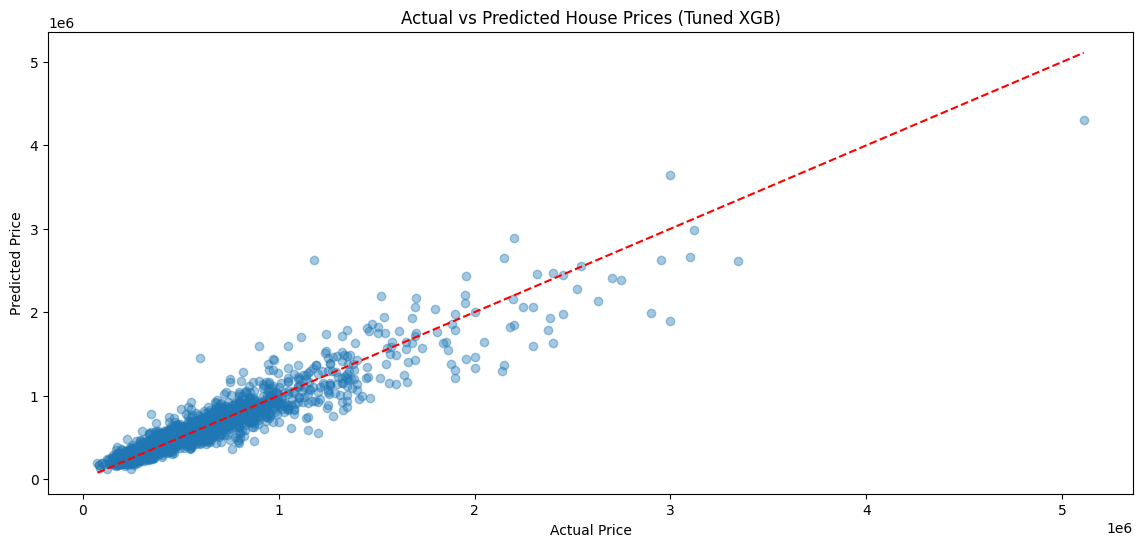

In [ ]:
plt.figure(figsize=(14,6))
plt.scatter(y_test, y_pred_tuned_xgb, alpha=0.4)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    color='red'
)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Tuned XGB)")
plt.show()

## **CNN**

### **Image(CNN) + Tabular(MLP) ----> Price**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/train.csv')

df["image_path"] = "/content/drive/MyDrive/Data/images_train/" + df["id"].astype(str) + ".png"

df[["id", "image_path"]].head()

,id,image_path
0,9117000170,/content/drive/MyDrive/Data/images_train/91170...
1,6700390210,/content/drive/MyDrive/Data/images_train/67003...
2,7212660540,/content/drive/MyDrive/Data/images_train/72126...
3,8562780200,/content/drive/MyDrive/Data/images_train/85627...
4,7760400350,/content/drive/MyDrive/Data/images_train/77604...


In [ ]:
import os

missing = df[
    ~df["image_path"].apply(os.path.exists)
]

print("Missing images:", len(missing))

Missing images: 0


In [ ]:
df.drop(columns=['id', 'date'],inplace=True)

# **Train-Test Split**

In [ ]:
X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(12967, 19)
(3242, 19)


In [ ]:
num_features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
    "floors", "waterfront", "view", "condition", "grade",
    "sqft_above", "sqft_basement", "yr_built", "yr_renovated",
    "sqft_living15", "sqft_lot15"
]

In [ ]:
X_train_num = X_train[num_features]
X_test_num = X_test[num_features]

train_img = X_train["image_path"].values
test_img = X_test["image_path"].values

# **Feature Scaling for CNN**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3

In [ ]:
IMG_SIZE = 299

def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img

In [ ]:
def make_dataset(image_paths, tabular_data, labels, batch_size=32, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices(
        (image_paths, tabular_data, labels)
    )

    def parse(img_path, tab, y):
        img = load_image(img_path)
        return ({"image": img, "tabular": tab}, y)

    ds = ds.map(parse, num_parallel_calls=tf.data.AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1024)

    return ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_ds = make_dataset(
    train_img,
    X_train_num_scaled,
    y_train.values,
    batch_size=32,
    shuffle=True
)

test_ds = make_dataset(
    test_img,
    X_test_num_scaled,
    y_test.values,
    batch_size=32,
    shuffle=False
)

**Image branch (CNN InceptionV3)**

In [ ]:
image_input = layers.Input(shape=(299, 299, 3), name="image")

cnn_base = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=image_input
)
cnn_base.trainable = False

x = layers.GlobalAveragePooling2D()(cnn_base.output)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


**Tabular branch (MLP)**

In [ ]:
tabular_input = layers.Input(
    shape=(X_train_num_scaled.shape[1],),
    name="tabular"
)

t = layers.Dense(128, activation="relu")(tabular_input)
t = layers.Dense(64, activation="relu")(t)

**Fusion**

In [ ]:
combined = layers.Concatenate()([x, t])

z = layers.Dense(128, activation="relu")(combined)
z = layers.Dense(64, activation="relu")(z)
output = layers.Dense(1)(z)

model = models.Model(
    inputs=[image_input, tabular_input],
    outputs=output
)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="mse",
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 299, 299,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ image[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,042,913 (87.90 MB)

 Trainable params: 1,240,129 (4.73 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 887s 952ms/step - loss: 409263308800.0000 - root_mean_squared_error: 639143.7500 - val_loss: 134825246720.0000 - val_root_mean_squared_error: 367185.5625
Epoch 2/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 383s 928ms/step - loss: 142569832448.0000 - root_mean_squared_error: 377310.6875 - val_loss: 130138914816.0000 - val_root_mean_squared_error: 360747.7188
Epoch 3/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - loss: 146246991872.0000 - root_mean_squared_error: 381769.9688 - val_loss: 126915076096.0000 - val_root_mean_squared_error: 356251.4062
Epoch 4/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 488s 1s/step - loss: 136503787520.0000 - root_mean_squared_error: 369262.8750 - val_loss: 121936101376.0000 - val_root_mean_squared_error: 349193.5000
Epoch 5/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 238s 569ms/step - loss: 138531274752.0000 - root_mean_squared_error: 370461.0000 - val_loss: 115417235456.0000 - val_root_mean_squared_error: 339731.1250
Epoch 6/10
406/406 ━━━━━━━━━━━━━━━━━

In [ ]:
y_true = []
y_pred = []

for x, y in test_ds:
    preds = model.predict(x, verbose=0)
    y_true.extend(y.numpy())
    y_pred.extend(preds.flatten())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [ ]:
cnn_mse  = mean_squared_error(y_true, y_pred)
cnn_rmse = np.sqrt(cnn_mse)
cnn_mape = mean_absolute_percentage_error(y_true, y_pred) * 100
cnn_r2   = r2_score(y_true, y_pred)

print(f"MSE  : {cnn_mse:,.0f}")
print(f"RMSE : {cnn_rmse:,.0f}")
print(f"MAPE : {cnn_mape:.2f}%")
print(f"R²   : {cnn_r2:.4f}")

MSE  : 56,047,763,456
RMSE : 236,744
MAPE : 33.74%
R²   : 0.5534


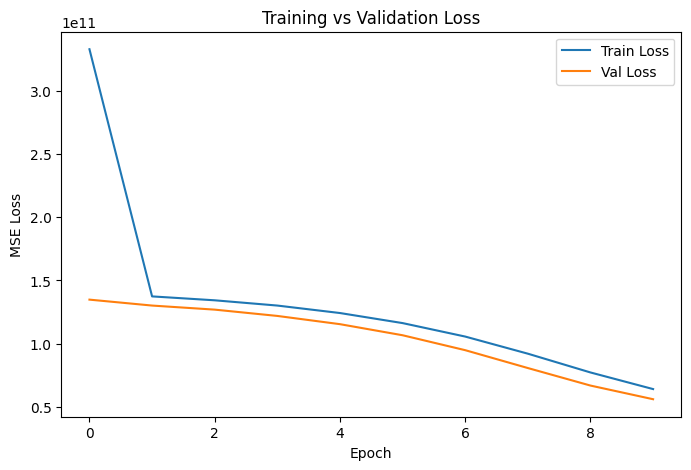

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

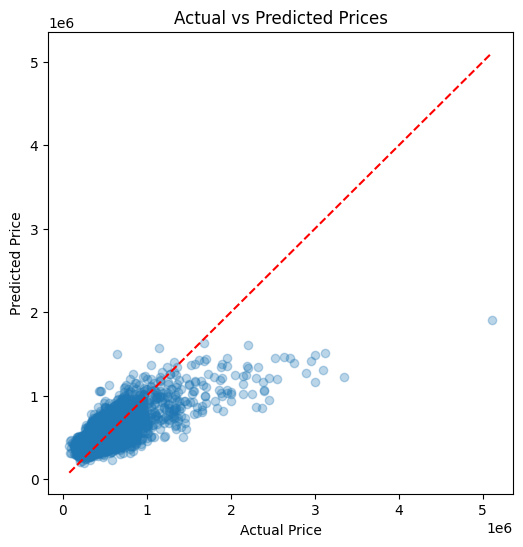

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.3)
plt.plot(
    [y_true.min(), y_true.max()],
    [y_true.min(), y_true.max()],
    "--r"
)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

# **Grad-Cam**

In [ ]:
last_conv_layer_name = "mixed10"

def make_gradcam_heatmap(img_tensor, tab_tensor, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[
            model.get_layer(last_conv_layer_name).output,
            model.output
        ]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model([img_tensor, tab_tensor])
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) + 1e-8

    return heatmap.numpy()

In [ ]:
idx = 0

img_path = test_img[idx]
tab_data = X_test_num_scaled[idx]

img = load_image(img_path)
img_tensor = tf.expand_dims(img, axis=0)

tab_tensor = tf.expand_dims(tab_data, axis=0)

In [ ]:
heatmap = make_gradcam_heatmap(
    img_tensor,
    tab_tensor,
    model,
    last_conv_layer_name
)

In [ ]:
import cv2

def overlay_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    return superimposed_img

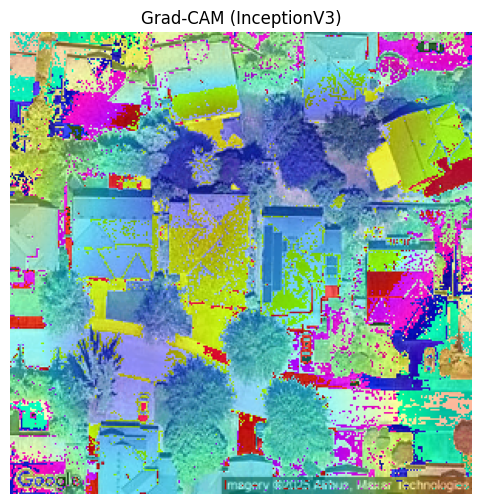

In [ ]:
cam_img = overlay_gradcam(img_path, heatmap)

plt.figure(figsize=(6,6))
plt.imshow(cam_img)
plt.axis("off")
plt.title("Grad-CAM (InceptionV3)")
plt.show()

**High-price vs low-price Grad-CAM**

In [ ]:
y_pred = model.predict(test_ds).flatten()

y_true = y_test.values

print("Predictions shape:", y_pred.shape)
print("True prices shape:", y_true.shape)

102/102 ━━━━━━━━━━━━━━━━━━━━ 32s 245ms/step
Predictions shape: (3242,)
True prices shape: (3242,)


In [ ]:
sorted_idx = np.argsort(y_true)

low_price_idxs  = sorted_idx[:5]
high_price_idxs = sorted_idx[-5:]

print("Low-price indices:", low_price_idxs)
print("High-price indices:", high_price_idxs)

Low-price indices: [2681 2221 1921 2971 2835]
High-price indices: [ 716 1729  900 2637 2970]


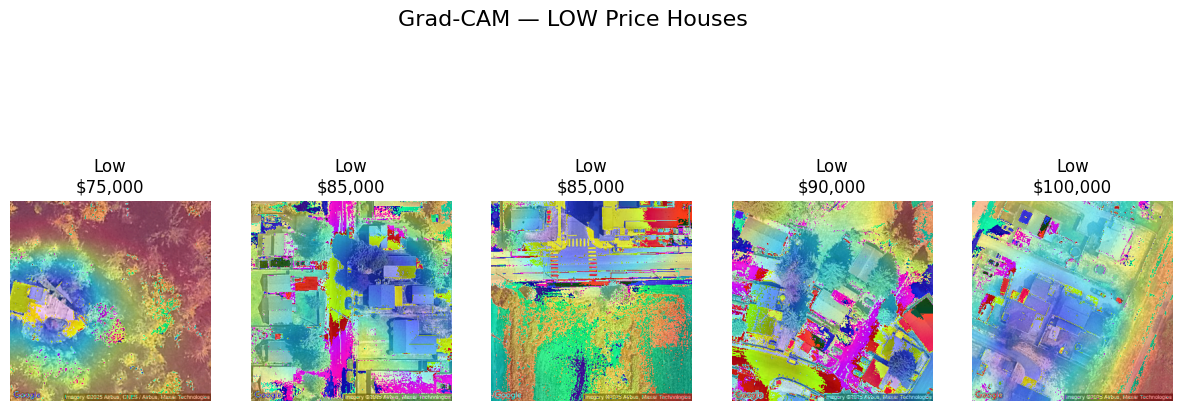

In [ ]:
plt.figure(figsize=(15, 6))

for i, idx in enumerate(low_price_idxs):
    img_path = test_img[idx]
    tab_data = X_test_num_scaled[idx]

    img_tensor = tf.expand_dims(load_image(img_path), axis=0)
    tab_tensor = tf.expand_dims(tab_data, axis=0)

    heatmap = make_gradcam_heatmap(
        img_tensor,
        tab_tensor,
        model,
        last_conv_layer_name="mixed10"
    )

    cam_img = overlay_gradcam(img_path, heatmap)

    plt.subplot(1, len(low_price_idxs), i + 1)
    plt.imshow(cam_img)
    plt.axis("off")
    plt.title(f"Low\n${y_true[idx]:,.0f}")

plt.suptitle("Grad-CAM — LOW Price Houses", fontsize=16)
plt.show()

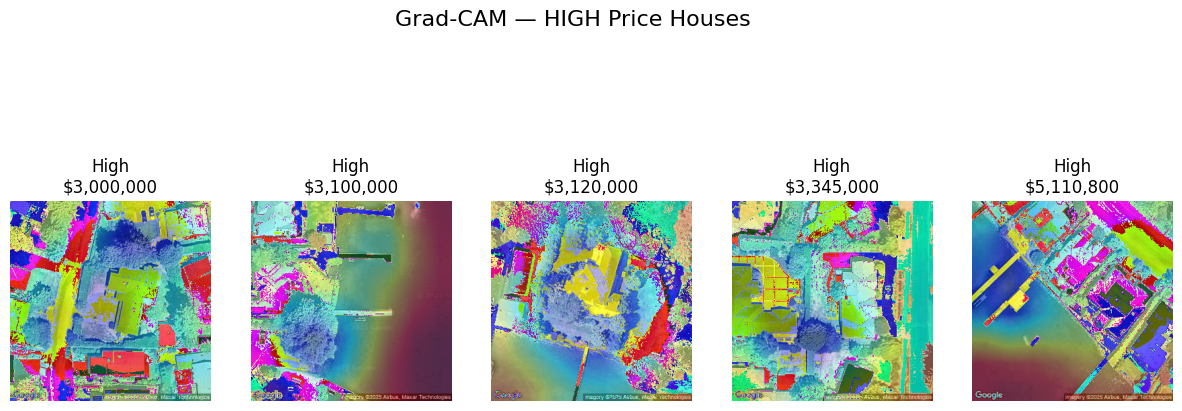

In [ ]:
plt.figure(figsize=(15, 6))

for i, idx in enumerate(high_price_idxs):
    img_path = test_img[idx]
    tab_data = X_test_num_scaled[idx]

    img_tensor = tf.expand_dims(load_image(img_path), axis=0)
    tab_tensor = tf.expand_dims(tab_data, axis=0)

    heatmap = make_gradcam_heatmap(
        img_tensor,
        tab_tensor,
        model,
        last_conv_layer_name="mixed10"
    )

    cam_img = overlay_gradcam(img_path, heatmap)

    plt.subplot(1, len(high_price_idxs), i + 1)
    plt.imshow(cam_img)
    plt.axis("off")
    plt.title(f"High\n${y_true[idx]:,.0f}")

plt.suptitle("Grad-CAM — HIGH Price Houses", fontsize=16)
plt.show()

# **Fusion Model consisting of XGBoost tuned and CNN**

XGBoost predictions (tabular)

In [ ]:
xgb_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                'floors', 'waterfront', 'view', 'condition',
                'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X_train_xgb = X_train[xgb_features]
X_test_xgb  = X_test[xgb_features]

xgb_pred_train = xgb_random.predict(X_train_xgb)
xgb_pred_test = xgb_random.predict(X_test_xgb)

CNN predictions

In [ ]:
cnn_pred_train = model.predict(train_ds).flatten()
cnn_pred_test = model.predict(test_ds).flatten()

406/406 ━━━━━━━━━━━━━━━━━━━━ 96s 219ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step


In [ ]:
X_fusion_train = np.column_stack([
    xgb_pred_train,
    cnn_pred_train
])

X_fusion_test = np.column_stack([
    xgb_pred_test,
    cnn_pred_test
])

In [ ]:
y_fusion_train = y_train.values
y_fusion_test  = y_test.values

In [ ]:
from sklearn.linear_model import LinearRegression

fusion_model = LinearRegression()
fusion_model.fit(X_fusion_train, y_fusion_train)

LinearRegression()

In [ ]:
fusion_pred = fusion_model.predict(X_fusion_test)

fusion_mse  = mean_squared_error(y_fusion_test, fusion_pred)
fusion_rmse = np.sqrt(fusion_mse)
fusion_mape = mean_absolute_percentage_error(y_fusion_test, fusion_pred) * 100
fusion_r2   = r2_score(y_fusion_test, fusion_pred)

In [ ]:
print("Fusion R2:", fusion_r2)
print("Fusion MSE:", fusion_mse)
print("Fusion MAPE (%):", fusion_mape)
print("Fusion RMSE:", fusion_rmse)

Fusion R2: 0.8938423991203308
Fusion MSE: 13321572352.0
Fusion MAPE (%): 12.253522872924805
Fusion RMSE: 115419.11605968917


# **Comparision**

In [ ]:
models = ["XGBoost", "CNN", "Fusion XGB-CNN"]

metrics = {
    "MSE":  [tuned_xgb_mse, cnn_mse, fusion_mse],
    "RMSE": [tuned_xgb_rmse, cnn_rmse, fusion_rmse],
    "R2":   [tuned_xgb_r2, cnn_r2, fusion_r2],
    "MAPE":[tuned_xgb_mape, cnn_mape, fusion_mape]
}

In [ ]:
def plot_metric(metric_name, values, models):
    plt.figure(figsize=(7,5))
    bars = plt.bar(models, values)

    plt.title(f"{metric_name} Comparison Across Models", fontsize=14)
    plt.ylabel(metric_name)
    plt.xticks(rotation=15)

    for bar in bars:
        height = bar.get_height()
        if metric_name == "R2":
            label = f"{height:.5f}"
        elif metric_name == "MAPE":
            label = f"{height:.5f}%"
        else:
            label = f"{height:,.0f}"

        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            label,
            ha="center",
            va="bottom",
            fontsize=10
        )

    plt.tight_layout()
    plt.show()

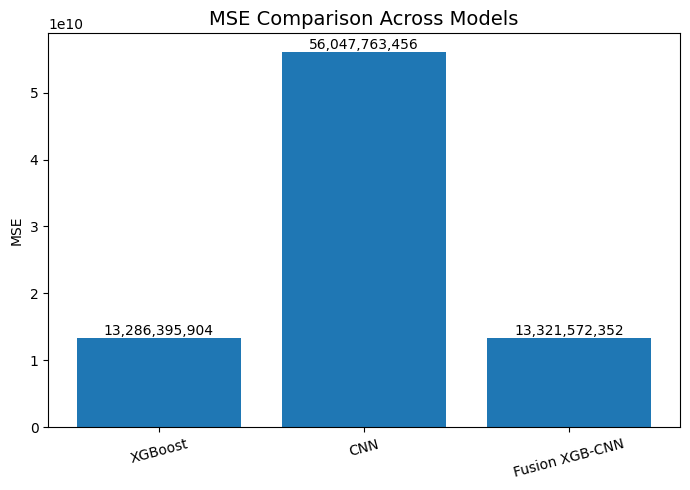

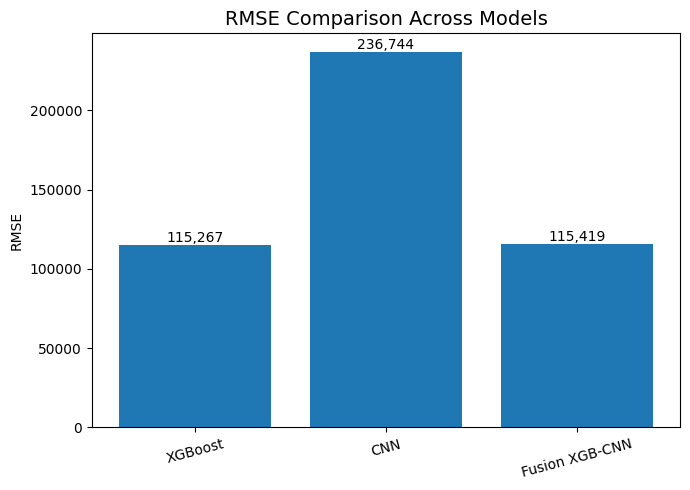

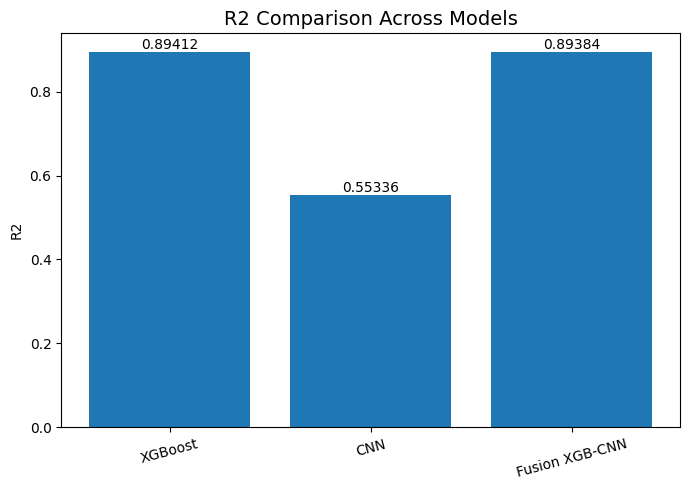

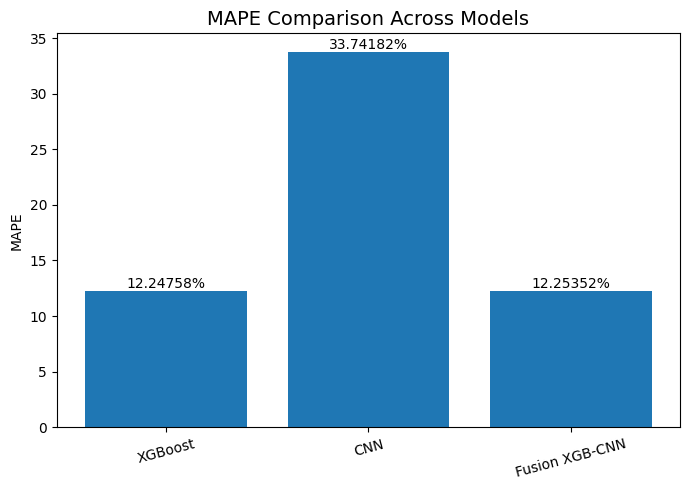

In [ ]:
for metric_name, values in metrics.items():
    plot_metric(metric_name, values, models)

In [ ]:
import joblib

joblib.dump(xgb_random, "xgboost_model.pkl")

model.save("cnn_inceptionv3_model.keras")

joblib.dump(fusion_model, "fusion_model.pkl")

joblib.dump(scaler, "tabular_scaler.pkl")

['tabular_scaler.pkl']

In [ ]:
!mv xgboost_model.pkl /content/drive/MyDrive/models/xgboost_model.pkl
!mv cnn_inceptionv3_model.keras /content/drive/MyDrive/models/cnn_inceptionv3_model.keras
!mv fusion_model.pkl /content/drive/MyDrive/models/fusion_model.pkl
!mv tabular_scaler.pkl /content/drive/MyDrive/models/tabular_scaler.pkl

In [ ]:
!ls -lh /content/drive/MyDrive/models


total 102M
-rw-------+ 1 root root  99M Dec 30 16:51 cnn_inceptionv3_model.keras
-rw-------+ 1 root root  557 Dec 30 16:51 fusion_model.pkl
-rw-------+ 1 root root 1.4K Dec 30 16:51 tabular_scaler.pkl
-rw-------+ 1 root root 3.0M Dec 30 16:51 xgboost_model.pkl
